<a href="https://colab.research.google.com/github/ChristianJJohnson/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Copy_of_LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

In [0]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# % = Jupyter Magic
# matplotlib inline = lets plt figures to show up into my notbook
%matplotlib inline

In [2]:
# Show me  available styles
plt.style.available

['seaborn-pastel',
 'dark_background',
 'seaborn-dark-palette',
 'seaborn-deep',
 'ggplot',
 'bmh',
 'seaborn-muted',
 'seaborn-talk',
 'seaborn-white',
 'seaborn',
 'seaborn-ticks',
 'seaborn-colorblind',
 'fast',
 'seaborn-notebook',
 'Solarize_Light2',
 'tableau-colorblind10',
 'fivethirtyeight',
 'seaborn-poster',
 'classic',
 'seaborn-bright',
 'seaborn-paper',
 'seaborn-dark',
 'grayscale',
 '_classic_test',
 'seaborn-darkgrid',
 'seaborn-whitegrid']

In [0]:
# Use the default style
plt.style.use('fast')

In [4]:
# Read in the titanic dataset
url = "https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv"
df = pd.read_csv(url)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [5]:
# Pclass in a interesting piece of data in that it could be considered Catagorical but also seen as Discreate (Up to a persons interpretation)
# Creating the Cabin_Class column turning Pclass into a true catagorical piece where there's no question about the finitely of the data and no logical order
df['Cabin_Class'] = df['Pclass'].map({1:'First', 2:'Second', 3:'Third'})
df[['Pclass', 'Cabin_Class']].head(5)

,Pclass,Cabin_Class
0,3,Third
1,1,First
2,3,Third
3,1,First
4,3,Third


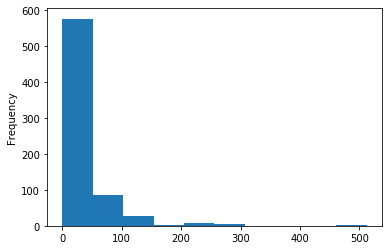

In [6]:
# Built in Pandas plot
df['Fare'].plot(kind='hist');

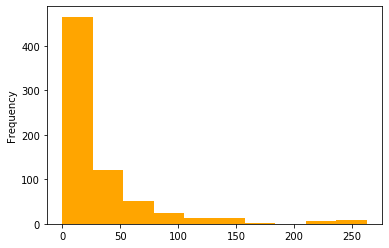

In [7]:
# Get rid of the extreme outliners
df = df[df['Fare']<500]
df['Fare'].plot(kind='hist', color='orange')

In [0]:
# I can transform continuous data into categorical by using binning
farebins = [0, 8, 15, 33, 512]
farelabels = ['low', 'med', 'high', 'vhigh']
df['Fare_groups'] = pd.cut(df['Fare'],
                           bins=farebins,
                           labels=farelabels)

In [9]:
# Check the value counts and make sure everything works
df['Fare_groups'].value_counts()

med      189
high     185
vhigh    174
low      154
Name: Fare_groups, dtype: int64

In [0]:
# save that to the myresults varible but sort by the index (How they are above)
myresults = df['Fare_groups'].value_counts().sort_index()

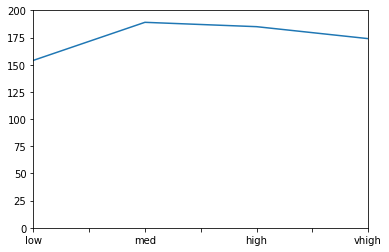

In [11]:
myresults.plot(ylim=(0,200));

**Plotting a single continuous varible**

count    709.000000
mean      29.618011
std       14.518828
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


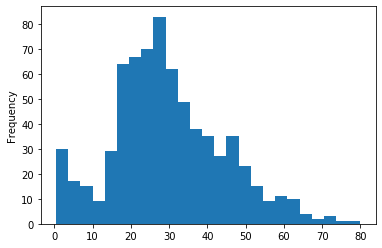

In [12]:
print(df['Age'].describe())
# Plot the column
df['Age'].plot(kind='hist', bins=25);

In [0]:
# I think it will show up better dark
plt.style.use('dark_background')

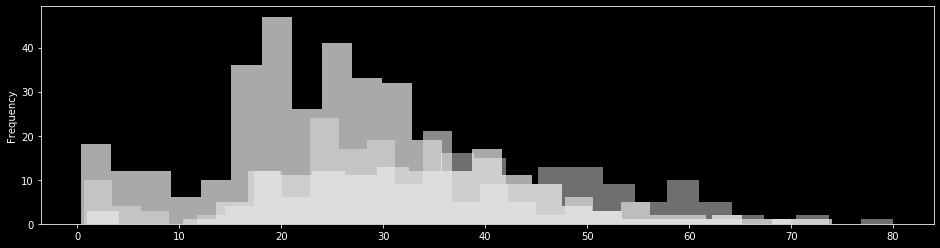

In [14]:
df[df['Cabin_Class']=='Third']['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='darkgrey', alpha=1);
df[df['Cabin_Class']=='Second']['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='lightgrey', alpha=.66);
df[df['Cabin_Class']=='First']['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='white', alpha=.44);

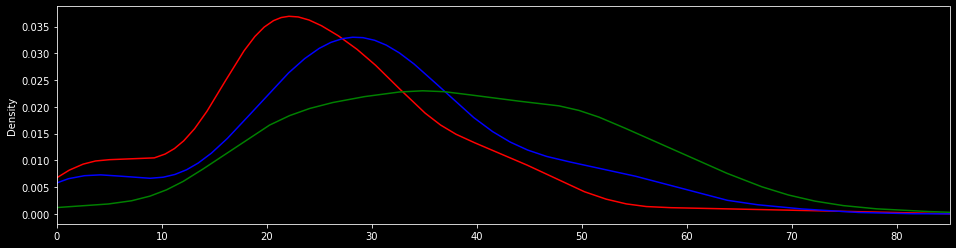

In [15]:
df[df['Cabin_Class']=='Third']['Age'].plot(kind='density', xlim=(0,85), figsize=(16,4), color='red');
df[df['Cabin_Class']=='Second']['Age'].plot(kind='density', xlim=(0,85), figsize=(16,4), color='blue');
df[df['Cabin_Class']=='First']['Age'].plot(kind='density', xlim=(0,85), figsize=(16,4), color='green');

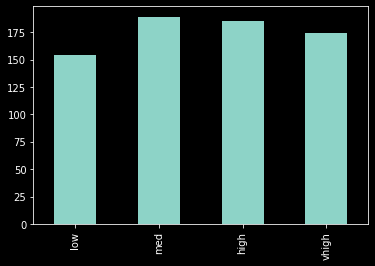

In [16]:
myresults.plot(kind='bar');

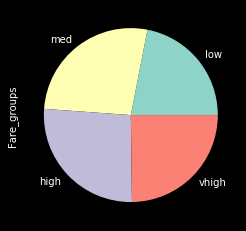

In [17]:
myresults.plot(kind='pie');

**Comparing two Categorical varibles**

In [0]:
plt.style.use('seaborn-deep')

In [19]:
killshot = pd.crosstab(df['Cabin_Class'], df['Survived'])
killshot

Survived,0,1
Cabin_Class,,
First,64,117
Second,90,83
Third,270,85


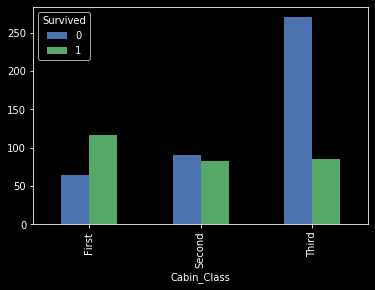

In [20]:
killshot.plot(kind='bar')

In [21]:
# add percentage down columns
killcab = pd.crosstab(df['Cabin_Class'], df['Survived'], normalize='columns')
killcab

Survived,0,1
Cabin_Class,,
First,0.150943,0.410526
Second,0.212264,0.291228
Third,0.636792,0.298246


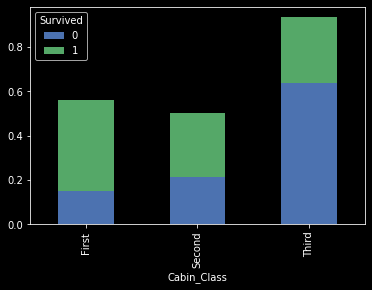

In [22]:
killcab.plot(kind='bar', stacked=True)

In [23]:
# add percentage across the rows
deathcab = pd.crosstab(df['Cabin_Class'], df['Survived'], normalize='index')
deathcab

Survived,0,1
Cabin_Class,,
First,0.353591,0.646409
Second,0.520231,0.479769
Third,0.760563,0.239437


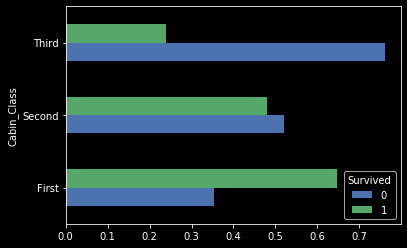

In [24]:
deathcab.plot(kind='barh')

**Compare Categorical Varible With A Continuous One**

In [25]:
cab_age = df.groupby('Cabin_Class')['Age'].mean()
cab_age

Cabin_Class
First     38.151492
Second    29.877630
Third     25.140620
Name: Age, dtype: float64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='box')` instead of `Series.plot('box',)`.
  """Entry point for launching an IPython kernel.


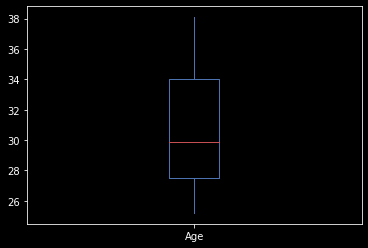

In [26]:
cab_age.plot('box')

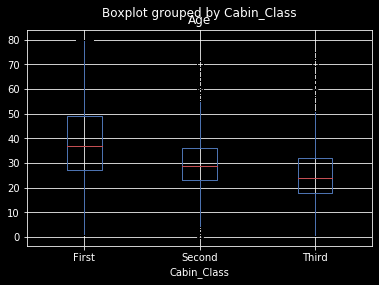

In [27]:
df.boxplot(column='Age', by='Cabin_Class')

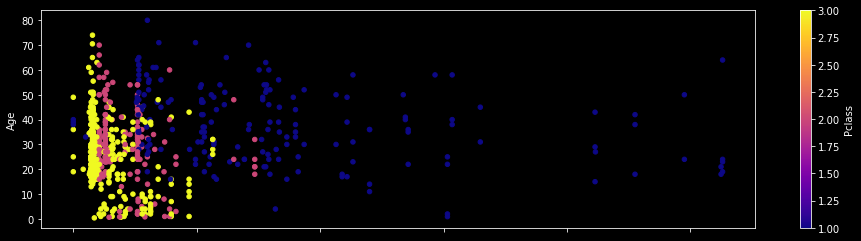

In [28]:
df.plot(kind='scatter', x='Fare', y='Age', c='Pclass', colormap='plasma', figsize=(16,4))

**Compare multiple continuous varibles**

In [29]:
corr_matrix = df.corr()
corr_matrix

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


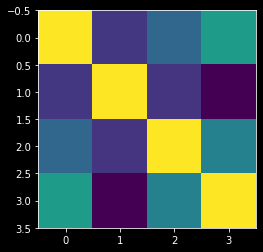

In [30]:
# good way to display that
plt.imshow(corr_matrix)

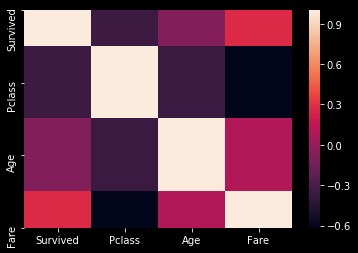

In [31]:
# Seaborn
sns.heatmap(corr_matrix)

**Intro to Matplotlib**

In [32]:
x = np.linspace(0, 6, 13)
y = x**2
print(x)
print(y)

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6. ]
[ 0.    0.25  1.    2.25  4.    6.25  9.   12.25 16.   20.25 25.   30.25
 36.  ]


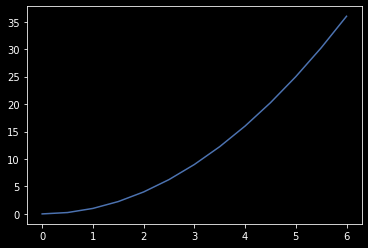

In [33]:
# Plot it up with mpl
plt.plot(x, y)

Text(0.5, 1.0, 'Ran off the title twice')

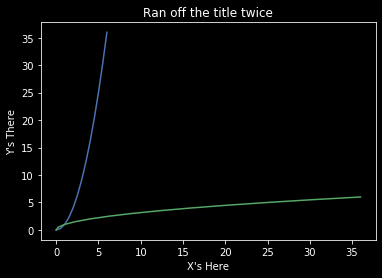

In [34]:
# Can combine multiple plots
plt.plot(x, y)
plt.plot(y, x)
# instead of parameters you have to build mpl out
plt.xlabel("X's Here")
plt.ylabel("Y's There")
plt.title("Ran off the title twice")

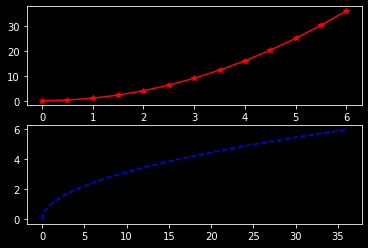

In [35]:
# Creating Multiplots on the same Canvas
plt.subplot(2,1,1)
plt.plot(x, y, 'r-*')
plt.subplot(2,1,2)
plt.plot(y, x, 'b--');

**The .figure Method. Dum Dun Dah**

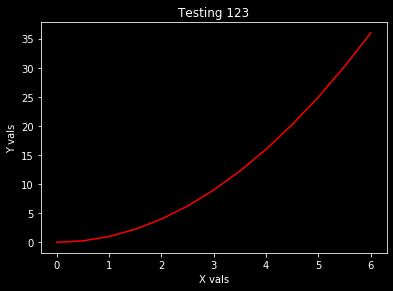

In [36]:
# Create blank figure
fig = plt.figure()

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # add_axes([left, bottom, width, height] Range between 0 and 1)

# plot of these axes
ax.plot(x, y, 'r')
ax.set_xlabel("X vals")
ax.set_ylabel("Y vals")
ax.set_title("Testing 123");
# Remember to use set_ to get methods going in the fig

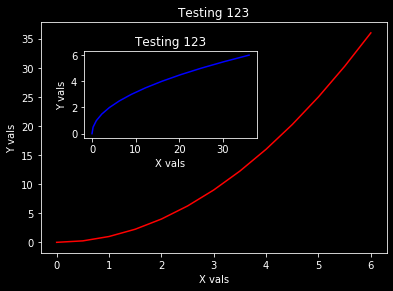

In [37]:
# Create blank figure
fig = plt.figure()

ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # add_axes([left, bottom, width, height] Range between 0 and 1)
ax2 = fig.add_axes([0.2, 0.5, 0.4, 0.3])

# plot of these axes
ax1.plot(x, y, 'r')
ax1.set_xlabel("X vals")
ax1.set_ylabel("Y vals")
ax1.set_title("Testing 123");
# Remember to use set_ to get methods going in the fig

ax2.plot(y, x, 'b')
ax2.set_xlabel("X vals")
ax2.set_ylabel("Y vals")
ax2.set_title("Testing 123");

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
lotcol = ['RespondentID',
    'Bet $10: Lottery A = success rate of 50% payout: $100, Lottery B = success rate of 90% payout: $20.',
           'Smoke cigarettes?',
           'Drink alchol?',
           'Gambler?',
           'Skydived before?',
           'Drive above speed limit?',
           'Cheated on significant other?',
           'Eat steak?',
           'Preferred Steak Temp?',
           'Gender',
           'Age',
           'Household Income',
           'Education',
           'Location (Census Region)']
lotto = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/steak-survey/steak-risk-survey.csv', skiprows=2)


In [0]:
lotto.columns = lotcol

In [40]:
lotto.head()

,RespondentID,"Bet $10: Lottery A = success rate of 50% payout: $100, Lottery B = success rate of 90% payout: $20.",Smoke cigarettes?,Drink alchol?,Gambler?,Skydived before?,Drive above speed limit?,Cheated on significant other?,Eat steak?,Preferred Steak Temp?,Gender,Age,Household Income,Education,Location (Census Region)
0,3234982343,Lottery A,No,Yes,No,No,No,No,Yes,Medium rare,Male,> 60,"$50,000 - $99,999",Some college or Associate degree,East North Central
1,3234973379,Lottery A,No,Yes,Yes,No,Yes,Yes,Yes,Rare,Male,> 60,"$150,000+",Graduate degree,South Atlantic
2,3234972383,Lottery B,Yes,Yes,Yes,No,Yes,Yes,Yes,Medium,Male,> 60,"$50,000 - $99,999",Bachelor degree,New England
3,3234958833,Lottery B,No,Yes,No,No,Yes,Yes,Yes,Medium,Male,> 60,"$50,000 - $99,999",Graduate degree,Middle Atlantic
4,3234955240,Lottery A,No,No,No,No,Yes,No,Yes,Medium rare,Male,18-29,"$0 - $24,999",Some college or Associate degree,West South Central


In [41]:
lotto.tail()

,RespondentID,"Bet $10: Lottery A = success rate of 50% payout: $100, Lottery B = success rate of 90% payout: $20.",Smoke cigarettes?,Drink alchol?,Gambler?,Skydived before?,Drive above speed limit?,Cheated on significant other?,Eat steak?,Preferred Steak Temp?,Gender,Age,Household Income,Education,Location (Census Region)
544,3234761827,Lottery B,No,No,No,No,Yes,No,Yes,Medium rare,Female,18-29,"$25,000 - $49,999",High school degree,South Atlantic
545,3234761718,Lottery A,No,Yes,No,Yes,Yes,No,No,NaN,Female,> 60,"$50,000 - $99,999",Some college or Associate degree,Mountain
546,3234761071,Lottery A,Yes,Yes,Yes,No,Yes,No,Yes,Medium rare,Male,30-44,"$50,000 - $99,999",Some college or Associate degree,South Atlantic
547,3234760930,Lottery A,No,Yes,Yes,No,Yes,Yes,No,NaN,Female,45-60,"$50,000 - $99,999",Some college or Associate degree,Pacific
548,3234760413,Lottery B,Yes,Yes,Yes,No,Yes,No,Yes,Medium,Male,18-29,"$0 - $24,999",NaN,Mountain


In [46]:
# Getting values
x = lotto['Preferred Steak Temp?'].dropna()
x.value_counts()

Medium rare    166
Medium         132
Medium Well     75
Well            36
Rare            23
Name: Preferred Steak Temp?, dtype: int64

In [0]:
label = np.array(['Rare','Medium rare', 'Medium', 'Medium Well', 'Well'])
values = np.array([5,38,31,17,8])

In [0]:
def steak_plot(label, values): 
  plt.style.use('seaborn-white')

  # Create blank figure
  fig = plt.figure(figsize=(10, 4))

  ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # add_axes([left, bottom, width, height] Range between 0 and 1))

  # Makes the bar chart
  plt.barh(label, values, color=['#B64240', '#B36154', '#955731', '#703F2B','#370B03'])
  # Label on the y axis
  ax.set_ylabel('Steak Tempature', fontsize=12)
  # Label on the x axis
  ax.set_xlabel('Percentage of People', fontsize=12)


  # Title of the Chart
  ax.set_title('How Do You Like Your Steak Prepared?', fontsize=20)
  # Suptitle of the Chart
  #("From a survey of 432 steak-eating Americans", fontsize=15)


  # Actually plt it out
  plt.show();

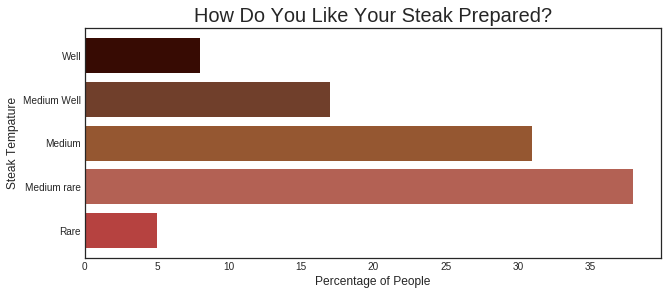

In [115]:
steak_plot(label, values)

In [107]:
# Display image in jupyter
from IPython.display import display, Image
url = 'https://fivethirtyeight.com/wp-content/uploads/2014/05/hickey-datalab-steak.png'
bar_ex = Image(url=url, width=625)
display(bar_ex)

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here